# **NETFLIX ANALYSIS**

**ADD LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**LOAD, READ AND ANALIZE THE DATA**

In [2]:
df = pd.read_csv("/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv")

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None


# **DATA CLEANING**

IDENTIFY NULL OR MISSING VALUES

In [5]:
print("\nIndentifying NULL or missing values")
print(df.isnull().sum())


Indentifying NULL or missing values
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [6]:
#Find if ID has duplicate values
print(df.duplicated().sum())

0


CHECK UNIQUENESS

In [7]:
print(f"Type total: {df['type'].nunique()}")
print(f"Directors total: {df['director'].nunique()}")
print(f"Countries total: {df['country'].nunique()}")
print(f"Ratings total: {df['rating'].nunique()}")
print(f"Categories total: {df['listed_in'].nunique()}")

Type total: 2
Directors total: 4528
Countries total: 86
Ratings total: 14
Categories total: 513


In [8]:
print(f"{df['type'].unique()}")
print(f"{df['rating'].unique()}")

['Movie' 'TV Show']
['PG-13' 'TV-MA' 'TV-PG' 'TV-14' 'TV-Y7' 'TV-Y' 'PG' 'TV-G' 'R' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


I searched on internet about every rating and created this table to undersand better the dataset and then use it to check if there is any relation with other values.

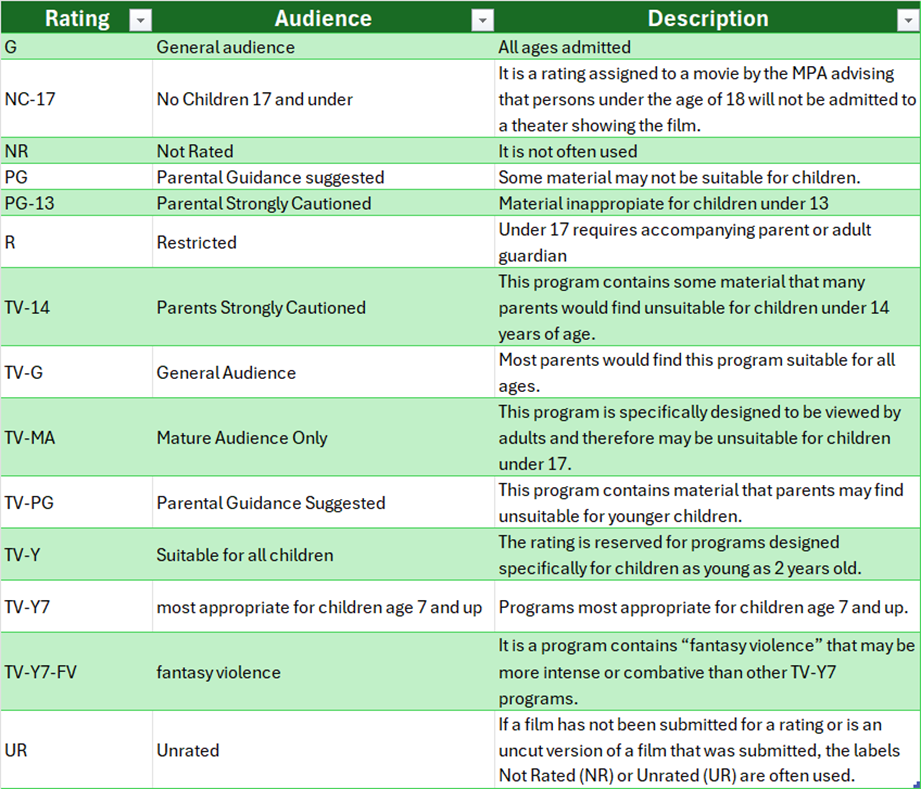

CHECK NUMBERS FORMAT (Date and Duration)

In [9]:
#Convert number to date
df['date_added'] = pd.to_datetime(df['date_added'])
#Extract the year from "date_added"
df['year_added'] = df["date_added"].dt.year
print(df['year_added'].unique())

[2021 2019 2018 2020 2017 2016 2015 2014 2013 2012 2011 2009 2008 2010]


In [10]:
#Separating str 'minute' or 'season' from duration column
duration_in_minutes = df.loc[df['duration'].str.contains('min'), 'Duration_type'] = 'Minute'
duration_in_seasons = df.loc[df['duration'].str.contains('Season'), 'Duration_type'] = 'Season'
print("\nSplit up 'Season' and 'Minutes' from 'duration':  ")
print(f"Duration type is: \n{df['Duration_type']}")


Split up 'Season' and 'Minutes' from 'duration':  
Duration type is: 
0       Minute
1       Season
2       Season
3       Minute
4       Minute
         ...  
8785    Season
8786    Season
8787    Season
8788    Season
8789    Season
Name: Duration_type, Length: 8790, dtype: object


In [11]:
#Separating number from duration column
df['Numerical_duration'] = df['duration'].str.extract('(\d+)').astype(int)
print("\nSplit up the number from 'duration':  ")
print(f"Duration type is: \n{df['Numerical_duration']}")


Split up the number from 'duration':  
Duration type is: 
0        90
1         1
2         1
3        91
4       125
       ... 
8785      2
8786      3
8787      1
8788      1
8789      1
Name: Numerical_duration, Length: 8790, dtype: int64


In [12]:
#BASIC STADISTICS VARIABLES

#MOVIES given in "Minutes":

#Average
average_for_movie = df[df['Duration_type'] == 'Minute']['Numerical_duration'].mean()
print("Average:", int(average_for_movie), "minutes")

#Maximum
longest_for_movie = df[df['Duration_type'] == 'Minute']['Numerical_duration'].max()
print("Maximum:", longest_for_movie, "minutes")

#Minimum
shortest_for_movie = df[df['Duration_type'] == 'Minute']['Numerical_duration'].min()
print("Minimum:", shortest_for_movie, "minutes")

Average: 99 minutes
Maximum: 312 minutes
Minimum: 3 minutes


In [13]:
#TV Shows given in "Seasons":

#Average
average_for_TVShow = df[df['Duration_type'] == 'Season']['Numerical_duration'].mean()
print("Average:", int(average_for_TVShow), "seasons")

#Maximum
longest_for_TVShow = df[df['Duration_type'] == 'Season']['Numerical_duration'].max()
print("Maximum:", longest_for_TVShow, "seasons")

#Minimum
shortest_for_TVShow = df[df['Duration_type'] == 'Season']['Numerical_duration'].min()
print("Minimum:", shortest_for_TVShow, "seasons")


Average: 1 seasons
Maximum: 17 seasons
Minimum: 1 seasons


# **EXPLORATORY DATA ANALYSIS**

Total Movies = 6126
Total TV Shows = 2664


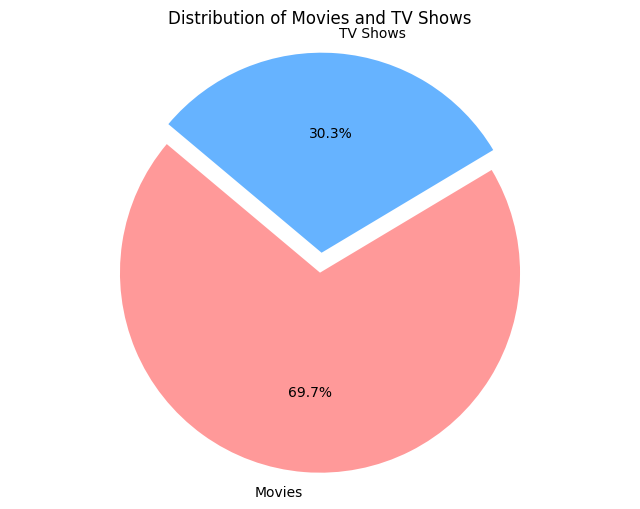

In [14]:
# Calculate the total of Movies and TV Shows y programas de TV
num_movies = df[df['type'] == 'Movie'].shape[0]
num_tv_shows = df[df['type'] == 'TV Show'].shape[0]
print(f"Total Movies = {num_movies}")
print(f"Total TV Shows = {num_tv_shows}")

# Percentages
total = num_movies + num_tv_shows
percentage_movies = (num_movies / total) * 100
percentage_tv_shows = (num_tv_shows / total) * 100

# Tags and values
labels = ['Movies', 'TV Shows']
colors = ['#ff9999', '#66b3ff']
sizes = [percentage_movies, percentage_tv_shows]
explode = (0.1, 0)  # Highlight the slice

# Create the graphic
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movies and TV Shows')
plt.axis('equal')
plt.show()

Movies vs TV shows during last years

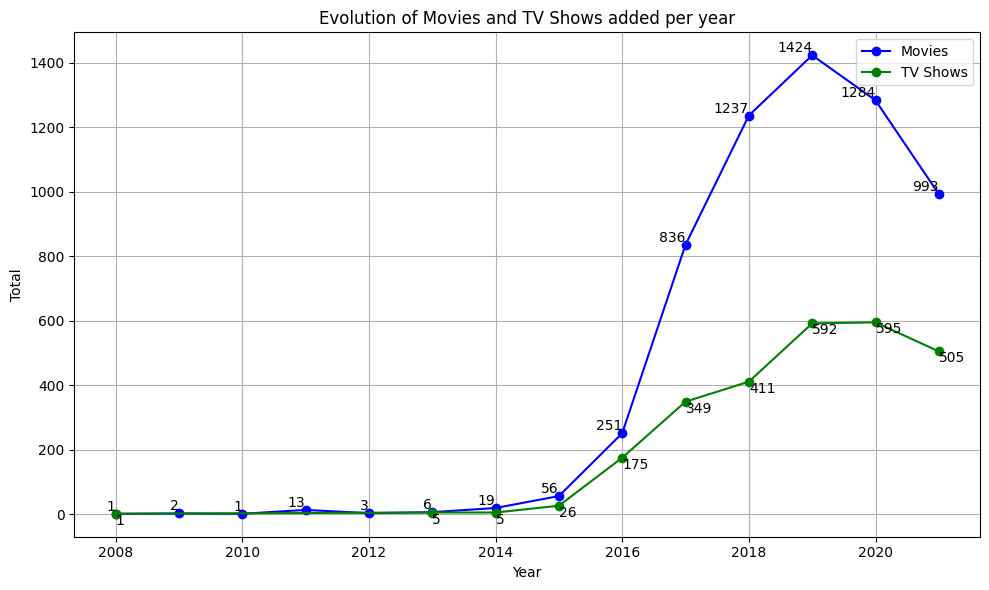

In [15]:
df_movies = df[df['type'] == 'Movie'].groupby('year_added').size()
df_tv_shows = df[df['type'] == 'TV Show'].groupby('year_added').size()

plt.figure(figsize=(10, 6))
plt.plot(df_movies.index, df_movies.values, marker='o', label='Movies', color='blue')
plt.plot(df_tv_shows.index, df_tv_shows.values, marker='o', label='TV Shows', color='green')

# Pinpoint values
for x, y in zip(df_movies.index, df_movies.values):
    plt.text(x, y, str(y), ha='right', va='bottom')

for x, y in zip(df_tv_shows.index, df_tv_shows.values):
    plt.text(x, y, str(y), ha='left', va='top')

    
plt.title('Evolution of Movies and TV Shows added per year')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend()


plt.grid(True)
plt.tight_layout()

plt.show()


Top 10 countries with more titles

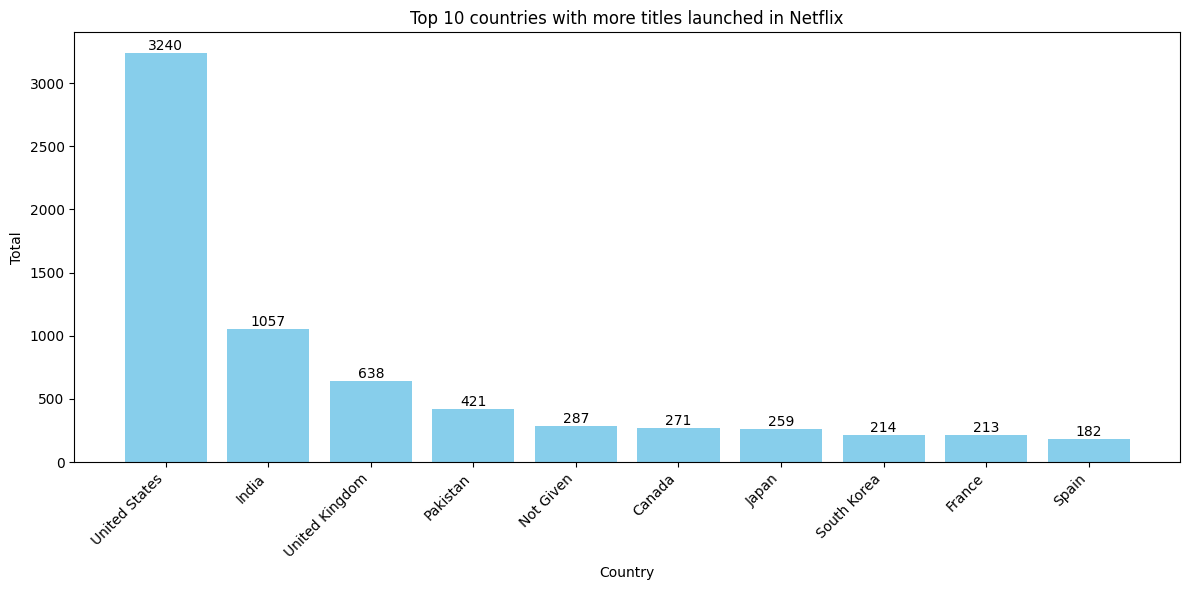

In [16]:
titles_by_country = df['country'].value_counts()

top_10_countries = titles_by_country.nlargest(10)

#Graphic bars
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_countries.index, top_10_countries.values, color='skyblue')

#Labels and headers
plt.title('Top 10 countries with more titles launched in Netflix')
plt.xlabel('Country')
plt.ylabel('Total')
plt.xticks(rotation=45, ha='right')

# Add value over each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.tight_layout()
plt.show()


After this bar chart we can identify there are many 'Not Given' titles in 'Country' column. I proceed to check what's the percentage of 'Not Given' compared with the rest and see if it's a "relevant" amount of movies.

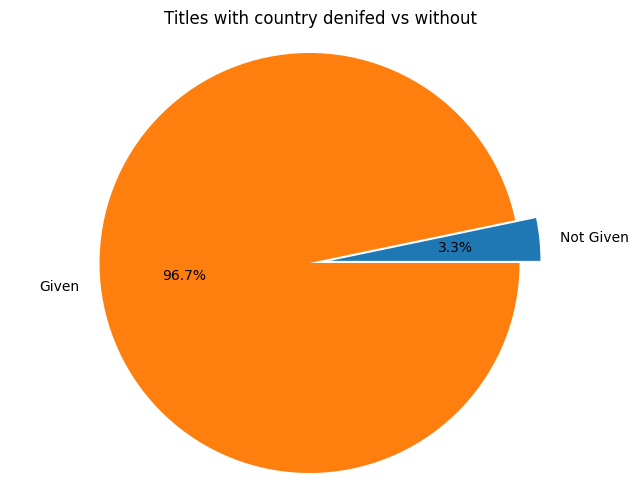

In [17]:
total_not_given = df[df['country'] == 'Not Given'].shape[0]
total_given = df[df['country'] != 'Not Given'].shape[0]

# Percentages
total = total_not_given + total_given
percentage_not_given = (total_not_given / total) * 100
percentage_given = (total_given / total) * 100

# Tags and values
labels = ['Not Given', 'Given']
sizes = [percentage_not_given, percentage_given]
explode = (0.1, 0)  # Highlight the slice

#Create the graphic
plt.figure(figsize=(8,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Titles with country denifed vs without')
plt.axis('equal')
plt.show()

We confirmed that 'Not Given' percentage is low compared with titles with a Country  defined, that's why I decided to ignore them and continue.

Note: what should we do if we do not want 'Not Given' as a value? 
We could replace these values with the value of **mode ↓** (imputation concept).

In [18]:
#Mode
mode_for_titles = df['country'].mode()[0]
print(f"Mode: {mode_for_titles}")


Mode: United States


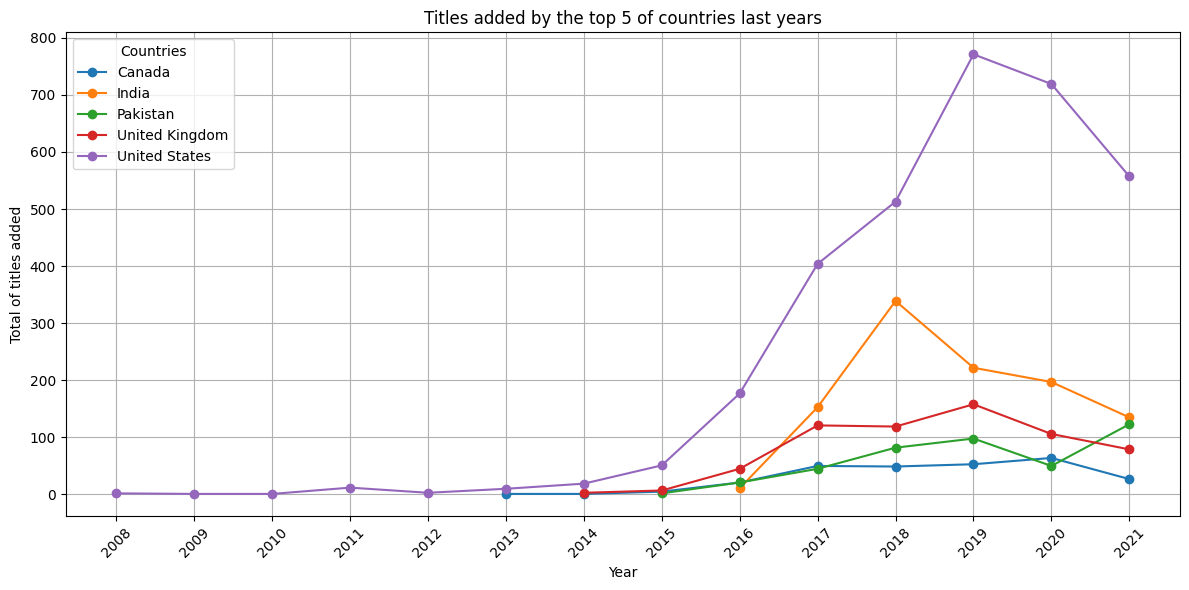

In [19]:
top_countries = df[df['country'] != 'Not Given']['country'].value_counts().head(5).index
#Sort by country
df_top_countries = df[df['country'].isin(top_countries)]
#Create the graphic
titles_by_year_country = df_top_countries.groupby(['year_added', 'country']).size().unstack()
plt.figure(figsize=(12, 6))
for country in titles_by_year_country.columns:
    plt.plot(titles_by_year_country.index, titles_by_year_country[country], marker='o', label=country)

# Add tags and header
plt.title('Titles added by the top 5 of countries last years')
plt.xlabel('Year')
plt.ylabel('Total of titles added')
plt.legend(title='Countries')

# Show the graphic
plt.grid(True)
plt.xticks(titles_by_year_country.index, rotation=45)
plt.tight_layout()
plt.show()

In [20]:
directors_not_given = df[df['director'] == 'Not Given'].shape[0]
print(f"Total of titles with an unspecified director: {directors_not_given}")
percentage_not_given_director = (directors_not_given/8790)*100
print(f"The percentage of titles with an unspecified director: {percentage_not_given_director:.1f}%")

Total of titles with an unspecified director: 2588
The percentage of titles with an unspecified director: 29.4%


It is a huge amount of titles, which means it is a variable we cannot use reliably.